In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('archive/spam.csv', encoding='latin-1')

In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
694,ham,Ah poop. Looks like ill prob have to send in m...,NaN,NaN,NaN
5454,ham,Im just wondering what your doing right now?,NaN,NaN,NaN
667,ham,This pay is &lt;DECIMAL&gt; lakhs:),NaN,NaN,NaN
571,ham,Do you know where my lab goggles went,NaN,NaN,NaN
1188,ham,All will come alive.better correct any good lo...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
#1. Data cleaning
#2. EDA
#3. Text pre processing
#4. MOdel building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
5200,spam,Call Germany for only 1 pence per minute! Call...
1449,ham,say thanks2.
3002,ham,I will see in half an hour
4877,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
4337,ham,Yes when is the appt again?


In [15]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2108,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...
2937,ham,Hey i've booked the pilates and yoga lesson al...
3733,ham,"4 tacos + 1 rajas burrito, right?"
1595,ham,Pls confirm the time to collect the cheque.
2667,ham,Why de. You looking good only:-)..


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [17]:
df['target']=encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
#check for duplicate values
df.duplicated().sum()

403

In [21]:
df=df.drop_duplicates(keep='first')

In [22]:
df.shape

(5169, 2)

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

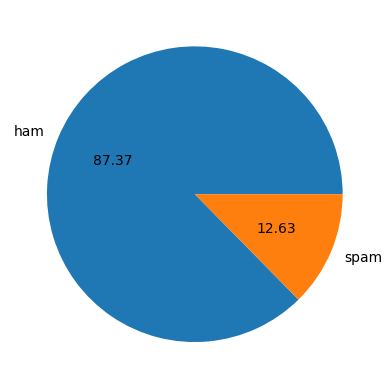

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
#data is imbalanced

In [26]:
import nltk

# Specify the directory containing the downloaded data
nltk.data.path.append(r"C:\Users\tekib\anaconda3\Scripts\nltk.exe")

# Now you can use NLTK without needing to download resources again



In [27]:
nltk.download('punkt')  # Downloads tokenizers models


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tekib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['sen_num']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words,sen_words,sen_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [40]:
df[['num_characters','num_words','sen_num']].describe()

,num_characters,num_words,sen_num
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#ham
df[df['target']==0][['num_characters','num_words','sen_num']].describe()

,num_characters,num_words,sen_num
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#spam
df[df['target']==1][['num_characters','num_words','sen_num']].describe()

,num_characters,num_words,sen_num
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [44]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

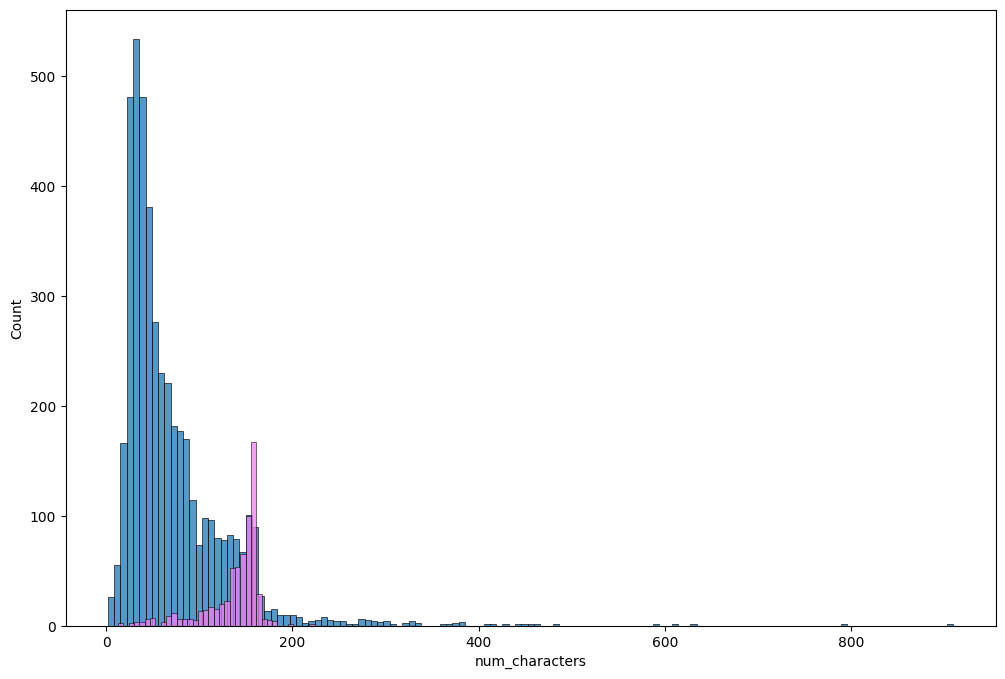

In [51]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='violet')

<Axes: xlabel='num_words', ylabel='Count'>

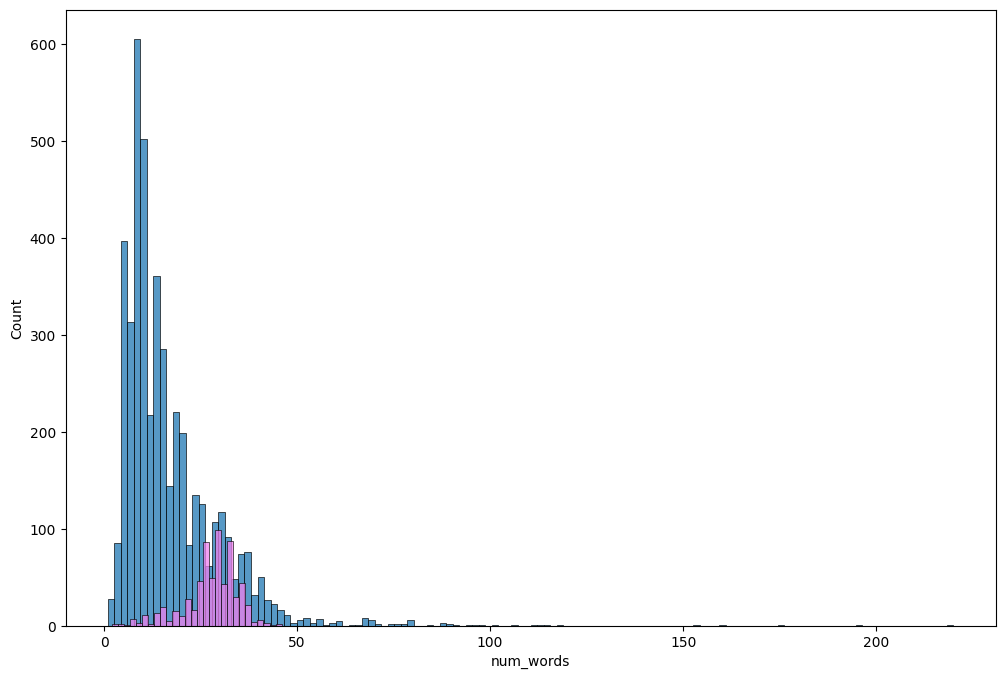

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='violet')

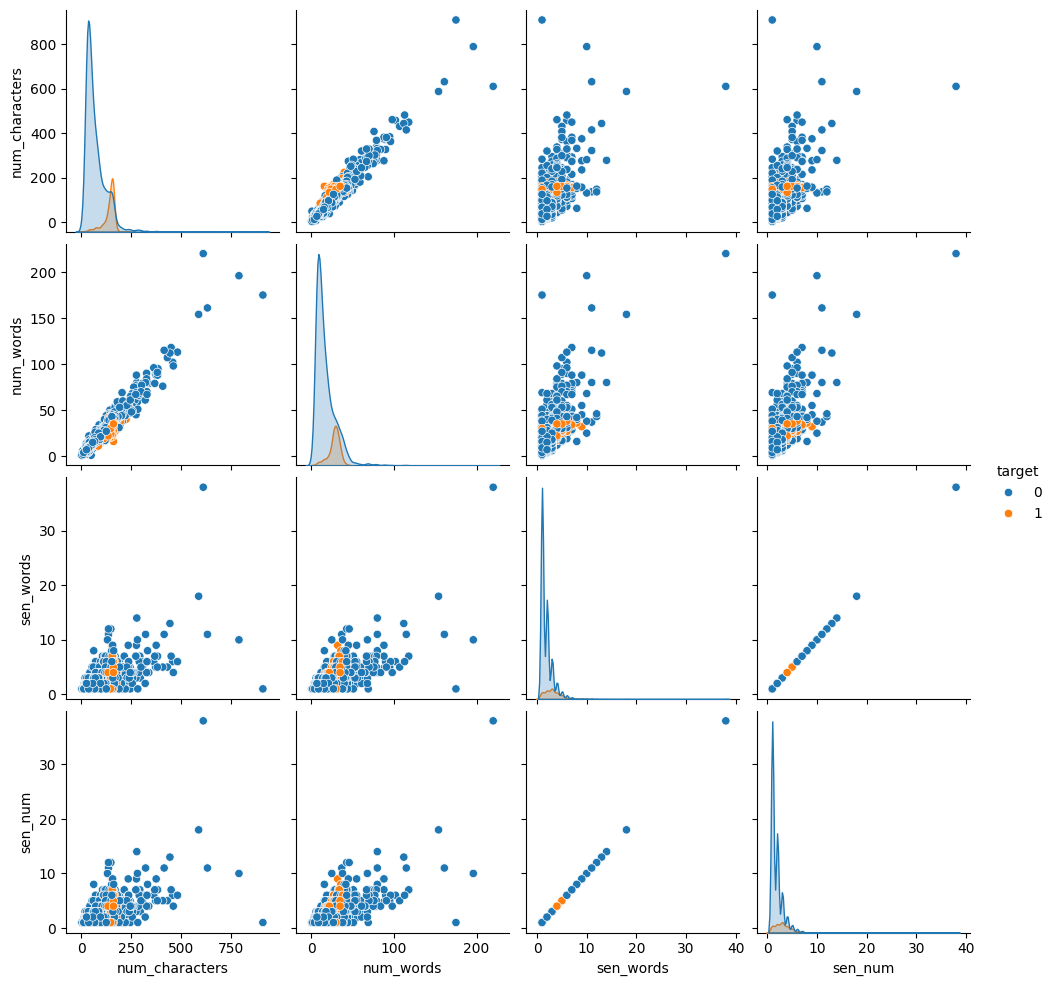

In [53]:
sns.pairplot(df,hue='target')

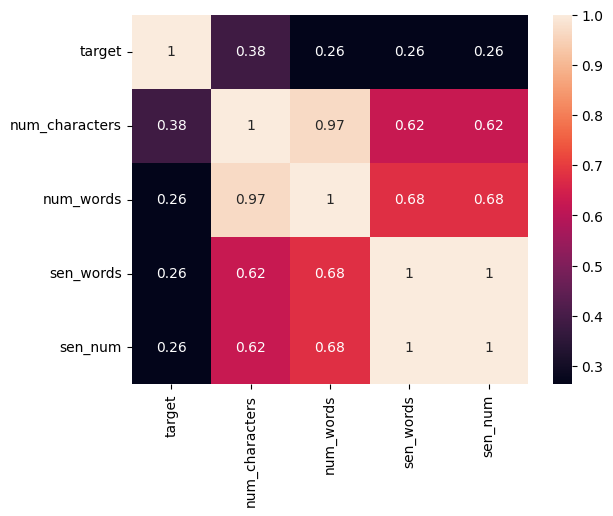

In [58]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = sns.heatmap( numeric_df.corr(),annot=True)


In [70]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenization(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i  in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')


In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

In [68]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('loving')

'love'

In [74]:
import nltk
from nltk.tokenize import word_tokenize

def transform_text(text):
    text = text.lower()
    words = word_tokenize(text)
    transformed_text = []
    for word in words:
        # Do your transformation here if needed
        transformed_text.append(word)
    return transformed_text


In [75]:
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  sen_words  sen_num  
0                111         24          2        2  
1                 29          8          2        2  
2  

In [88]:
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10)


In [89]:
# Convert values to strings and handle missing values
df['transformed_text'] = df['transformed_text'].astype(str)

# Generate WordCloud image with custom background color
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
  # Change "white" to your desired background color


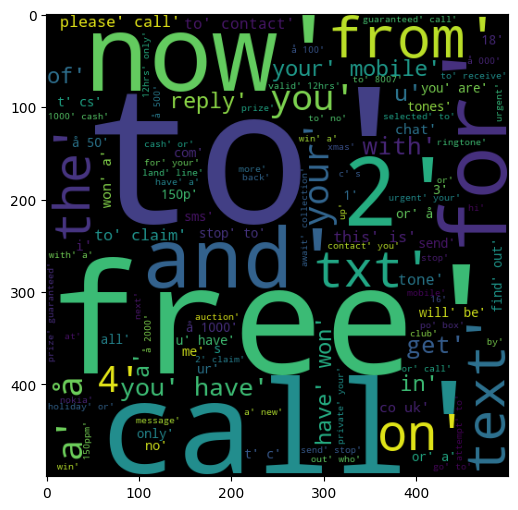

In [91]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [93]:
df['transformed_text'] = df['transformed_text'].astype(str)

# Generate WordCloud image with custom background color
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
  # Change "white" to your desired background color

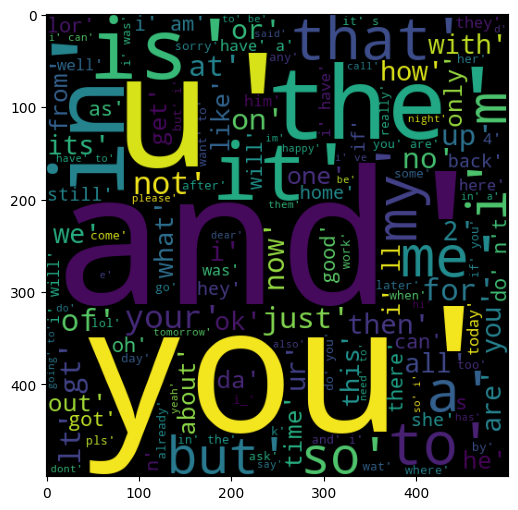

In [94]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [96]:
df.head()

,target,text,num_characters,num_words,sen_words,sen_num,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,"['go', 'until', 'jurong', 'point', ',', 'crazy..."
1,0,Ok lar... Joking wif u oni...,29,8,2,2,"['ok', 'lar', '...', 'joking', 'wif', 'u', 'on..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,"['free', 'entry', 'in', '2', 'a', 'wkly', 'com..."
3,0,U dun say so early hor... U c already then say...,49,13,1,1,"['u', 'dun', 'say', 'so', 'early', 'hor', '......"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,"['nah', 'i', 'do', ""n't"", 'think', 'he', 'goes..."


In [98]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [99]:
len(spam_corpus)

17983

<function matplotlib.pyplot.show(close=None, block=None)>

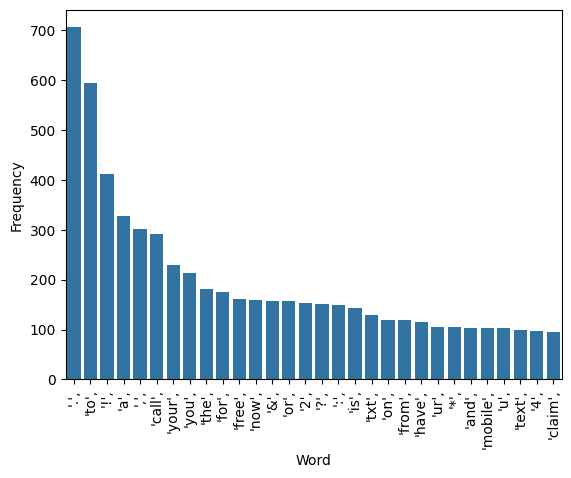

In [107]:
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming spam_corpus is your list of words or tokens
word_counter = Counter(spam_corpus)

# Create a DataFrame with the most common words
most_common_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show


In [108]:
ham_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [109]:
len(ham_corpus)

17983

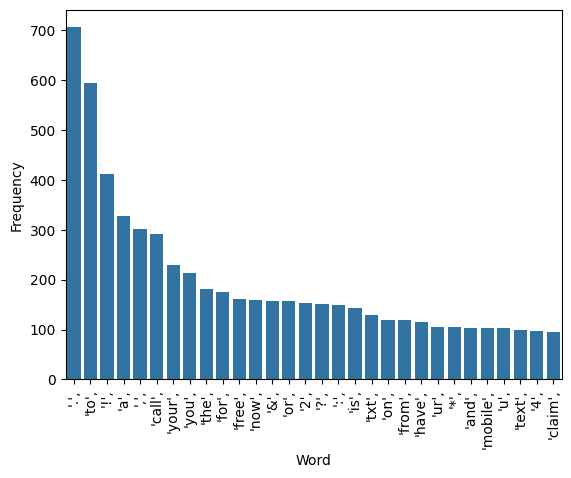

In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # You need to import matplotlib to use plt

from collections import Counter

# Assuming ham_corpus is your list of words or tokens
word_counter = Counter(ham_corpus)

# Create a DataFrame with the most common words
most_common_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Frequency'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()


In [258]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [259]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [260]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9294003868471954
[[835  61]
 [ 12 126]]
0.6737967914438503


In [261]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9535783365570599
[[896   0]
 [ 48  90]]
1.0


In [262]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[894   2]
 [ 14 124]]
0.9841269841269841


In [263]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))